<table class="ee-notebook-buttons" align="left"><td>
<a target="_blank"  href="https://colab.research.google.com/github/biagiominio/Remote_sensing_2021/blob/main/R_code_vegetation_indices.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a>
</td><td>
<a target="_blank"  href="https://github.com/biagiominio/Remote_sensing_2021/blob/main/R_code_vegetation_indices.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td></table>

# Deforestation in Mato Grosso, Brazil

An inland state of central Brazil, deep in the Amazon interior, Mato Grosso was long isolated from the outside world. A railroad, followed by highways and airplanes, eventually connected this state with other regions in the twentieth century. By the early twenty-first century, modern technology had clearly reached Mato Grosso—and produced widespread change.

The Thematic Mapper on NASA’s Landsat 5 satellite captured the top image of part of Mato Grosso on August 6, 1992. The Advanced Spaceborne Thermal Emission and Reflection Radiometer (ASTER) on NASA’s Terra satellite captured the bottom image of the same area on July 28, 2006. In both of these false-color images, red indicates vegetation, and the brighter the red, the denser the vegetation. The Rio Peixoto de Azevedo appears pale blue, nearly white, in 1992, perhaps a combination of reflective sediment or sunlight glinting off the water.

The most conspicuous difference between the images is the widespread forest clearing—visible as rectangles of gray-beige—that had occurred by 2006. The most intense areas of clearing appear along roadways, such as road MT-419, which runs east to west north of the river. A 2006 study found that Brazil’s mechanized agriculture increased by more than 3.6 million hectares (8.9 million acres) between 2001 and 2004, growing more than 540,000 hectares (1.3 million acres) in Mato Grosso alone. Clearing for pasture was still the leading cause of deforestation at that time, but the contribution from large agricultural clearings, such as for soy plantations, was increasing.

<table>
  <tr>
     <td>Mato Grosso on August 6, 1992</td>
     <td>Mato Grosso on July 28, 2006</td>
  </tr>
  <tr>
    <td><img src="https://eoimages.gsfc.nasa.gov/images/imagerecords/35000/35891/matogrosso_l5_1992219_lrg.jpg" width=500</td>
    <td><img src="https://eoimages.gsfc.nasa.gov/images/imagerecords/35000/35891/matogrosso_ast_2006209_lrg.jpg" width=500</td>
  </tr>
</table>

<font size="2"> [*NASA images*](https://earthobservatory.nasa.gov/images/35891/deforestation-in-mato-grosso-brazil) *created by Jesse Allen, using Landsat data provided by the United States Geological Survey and ASTER data provided courtesy of NASA/GSFC/METI/ERSDAC/JAROS, and U.S./Japan ASTER Science Team. Caption by Michon Scott.*</font> 

In [ ]:
mato_grosso_1992_url <- "https://eoimages.gsfc.nasa.gov/images/imagerecords/35000/35891/matogrosso_l5_1992219_lrg.jpg"
mato_grosso_2006_url <- "https://eoimages.gsfc.nasa.gov/images/imagerecords/35000/35891/matogrosso_ast_2006209_lrg.jpg"

The [download.file](https://www.rdocumentation.org/packages/utils/versions/3.6.2/topics/download.file) function can be used to download a file from the Internet. 
```
download.file(url, destfile)
```
In the function the `url` argument sets the resource to be downloaded and the `destfile` a character string with which the downloaded file is named.

In [ ]:
download.file(mato_grosso_1992_url, "Mato_Grosso_1992.jpg")
download.file(mato_grosso_2006_url, "Mato_Grosso_2006.jpg")

## Install R packages
The [install.packages](https://www.rdocumentation.org/packages/utils/versions/3.6.2/topics/install.packages) function is used to download and install packages from CRAN-like repositories.
To install multiple packages at the same time, you define a vector that contains the names of the packages to be installed.

The [raster](https://www.rdocumentation.org/packages/raster/versions/3.4-10) package defines classes and methods for spatial raster data access and manipulation. 

The [rasterVis](https://www.rdocumentation.org/packages/rasterVis/versions/0.50.2) package complements raster providing a set of methods for enhanced visualization and interaction.
The [rgdal](https://www.rdocumentation.org/packages/rgdal/versions/1.5-23) package provides links to the [GDAL](https://gdal.org/) library (Geospatial Data Abstraction Library) and access to projection/transformation operations from the "*PROJ*" library.

[RStoolbox](https://www.rdocumentation.org/packages/RStoolbox/versions/0.2.6) is an package providing a wide range of tools for your every-day remote sensing processing needs. The available tool-set covers many aspects for remote sensing image processing and analysis such as calculating spectral indices, principal component transformation, unsupervised and supervised classification or fractional cover analyses.

The [rasterdiv](https://www.rdocumentation.org/packages/rasterdiv/versions/0.2-3) package provides functions to calculate indices of diversity on numerical matrices based on information theory. The rationale behind the package is described in *Rocchini et al.* [*(2017*](https://www.sciencedirect.com/science/article/abs/pii/S1470160X16304319) and [*2021)*](https://onlinelibrary.wiley.com/doi/10.1111/geb.13270)

In [ ]:
packages <- c("raster", "RStoolbox", "rgdal", "rasterdiv", "rasterVis")
install.packages(packages)

The [library](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/library) function is used to load previously installed packages.
Using the [lapply](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/lapply) function we simultaneously apply the `library()` function to all elements of the vector containing the packages.



In [ ]:
lapply(packages , library, character.only = TRUE)

## Reading spatial data
To read and view a multilevel object it is common to use the [brick](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/brick) function (RasterBrick object). 

Explore the properties of the `mato_grosso_1992` and `mato_grosso_2006` object.



In [6]:
mato_grosso_1992 <- brick( "Mato_Grosso_1992.jpg")
mato_grosso_1992

class      : RasterBrick 
dimensions : 1500, 1200, 1800000, 3  (nrow, ncol, ncell, nlayers)
resolution : 1, 1  (x, y)
extent     : 0, 1200, 0, 1500  (xmin, xmax, ymin, ymax)
crs        : NA 
source     : Mato_Grosso_1992.jpg 
names      : Mato_Grosso_1992.1, Mato_Grosso_1992.2, Mato_Grosso_1992.3 
min values :                  0,                  0,                  0 
max values :                255,                255,                255 


The brick object has three bands that correspond to the following portions of the electromagnetic spectrum:

$\mathsf{B1}$ = Near Infrared; 
$\mathsf{B2}$ = Red;
$\mathsf{B3}$ = Green;

Change the names of a raster object using the [names](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/names) function.


In [7]:
names(mato_grosso_1992) <- c("nir", "red", "green")
mato_grosso_1992

class      : RasterBrick 
dimensions : 1500, 1200, 1800000, 3  (nrow, ncol, ncell, nlayers)
resolution : 1, 1  (x, y)
extent     : 0, 1200, 0, 1500  (xmin, xmax, ymin, ymax)
crs        : NA 
source     : Mato_Grosso_1992.jpg 
names      : nir, red, green 
min values :   0,   0,     0 
max values : 255, 255,   255 


In [9]:
mato_grosso_2006 <- brick( "Mato_Grosso_2006.jpg")
names(mato_grosso_2006) <- c("nir", "red", "green")

### Visualization of spatial data
Several generic functions have been implemented for "raster" objects to create maps and other plot types. For example, use [plot](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/plot) function to create a map of a raster object.
In addition, individual bands can be combined into a single image by assigning individual layers or bands to one of the three color channels (red, green and blue). 
The [plotRGB](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/plotRGB) function can be used to make "true (or false) color images" from multi-band satellite images.

Use the [par](https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/par) function to compare the images of Mato Grosso over the two different years.
Export the image using the [pdf](https://www.rdocumentation.org/packages/grDevices/versions/3.6.2/topics/pdf) function to enlarge it better and view the results.

N.B. always use the `dev.off()` function to manage the correct closing and loading of the graphics device.


In [48]:
dev.off()
pdf(file = '/content/compare.pdf')
par(mfrow=c(1,2))
plotRGB(mato_grosso_1992, r=1, g=2, b=3, stretch="lin")
plotRGB(mato_grosso_2006, r=1, g=2, b=3, stretch="lin")

## Vegetation indices
Vegetation indices are designed to maximize sensitivity to the vegetation characteristics while minimizing confounding factors such as soil background reflectance, directional, or atmospheric effects.
The most commonly used vegetation indices utilize the information contained in the red and near-infrared (NIR) canopy reflectances or radiances.


### Difference vegetation index (DVI)
Probably the simplest vegetation index. 

$\mathrm{DVI=NIR−Red}$

This index distinguishes between soil and vegetation, but it does not account for the difference between reflectance and radiance caused by atmospheric effects or shadows.


In [10]:
dvi_1992 <- mato_grosso_1992$nir - mato_grosso_1992$red
dvi_2006 <- mato_grosso_2006$nir - mato_grosso_2006$red

Use function [colorRampPalette](https://www.rdocumentation.org/packages/dichromat/versions/1.1/topics/colorRampPalette) to create a continuous color scale divided into n-levels.


In [ ]:
cl <- colorRampPalette(c('darkblue','yellow','red','black'))(100) # specifying a color scheme

Use [plot](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/plot) function to create a map of a raster object.
Use the `par` function to compare the DVI images of Mato Grosso over the two different years. Export the image using the `pdf` function to enlarge it better and view the results.

In [ ]:
dev.off()
pdf(file = '/content/compare_dvi.pdf')
par(mfrow=c(1,2))
plot(dvi_1992, col=cl, main="DVI at time 1992")
plot(dvi_2006, col=cl, main="DVI at time 2006")

In [ ]:
dev.off()
dif_dvi <- dvi_1992 - dvi_2006
cld <- colorRampPalette(c('blue','white','red'))(100)
plot(dif_dvi, col=cld, axes=FALSE)


### Normalized difference vegetation index (NDVI)
Surely the most used as a vegetation index, it represents a good measure of healthy and green vegetation.
The combination of its normalized difference formulation and use of the highest absorption and reflectance regions of chlorophyll make it robust over a wide range of conditions. 
It can, however, saturate in dense vegetation conditions when LAI (Leaf Area Index) becomes high.

\begin{equation}
\mathrm{NDVI=\frac{NIR-red}{NIR+red}}
\end{equation}

The value of this index ranges from −1 to 1. The common range for green vegetation is 0.2–0.8.

In [ ]:
# Normalized difference vegetation index (NDVI)
ndvi_1992 <- (mato_grosso_1992$nir - mato_grosso_1992$red)/(mato_grosso_1992$nir + mato_grosso_1992$red)
ndvi_2006 <- (mato_grosso_2006$nir - mato_grosso_2006$red)/(mato_grosso_2006$nir + mato_grosso_2006$red)

Warning message in ndvi_1992 - ndvi_2006:
“Raster objects have different extents. Result for their intersection is returned”


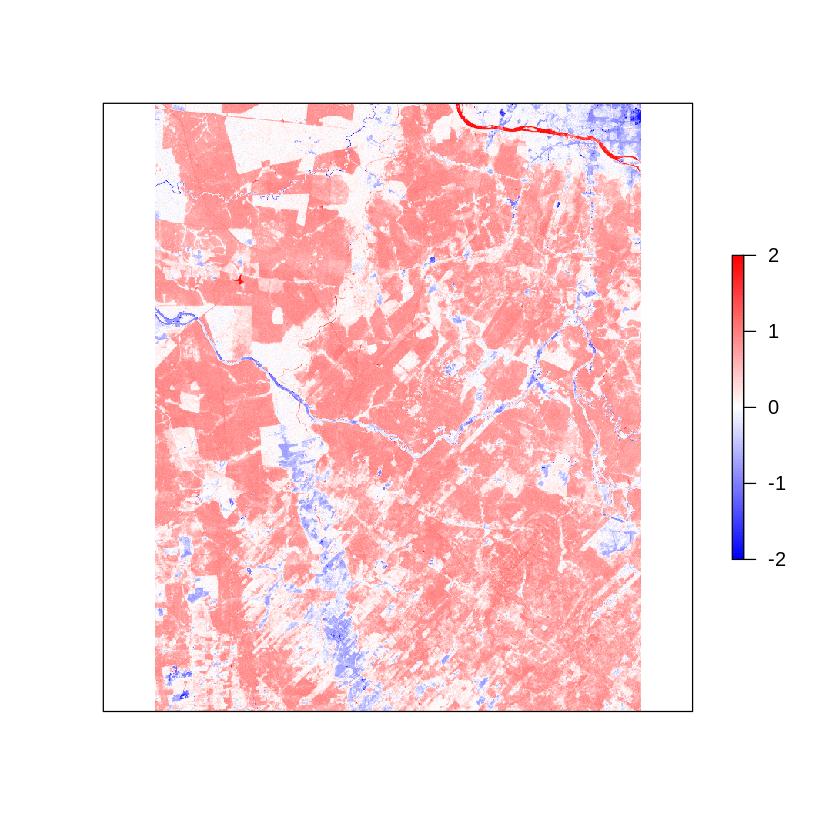

In [ ]:
dif_ndvi <- ndvi_1992 - ndvi_2006
cld <- colorRampPalette(c('blue','white','red'))(100)
plot(dif_ndvi, col=cld, axes=FALSE)

Warning message:
“EVI/EVI2 parameters L_evi, G, C1 and C2 are defined for reflectance [0,1] but img values are outside of this range.
  If you are using scaled reflectance values please provide the scaleFactor argument.
  If img is in DN or radiance it must be converted to reflectance.
  Skipping EVI calculation.
”


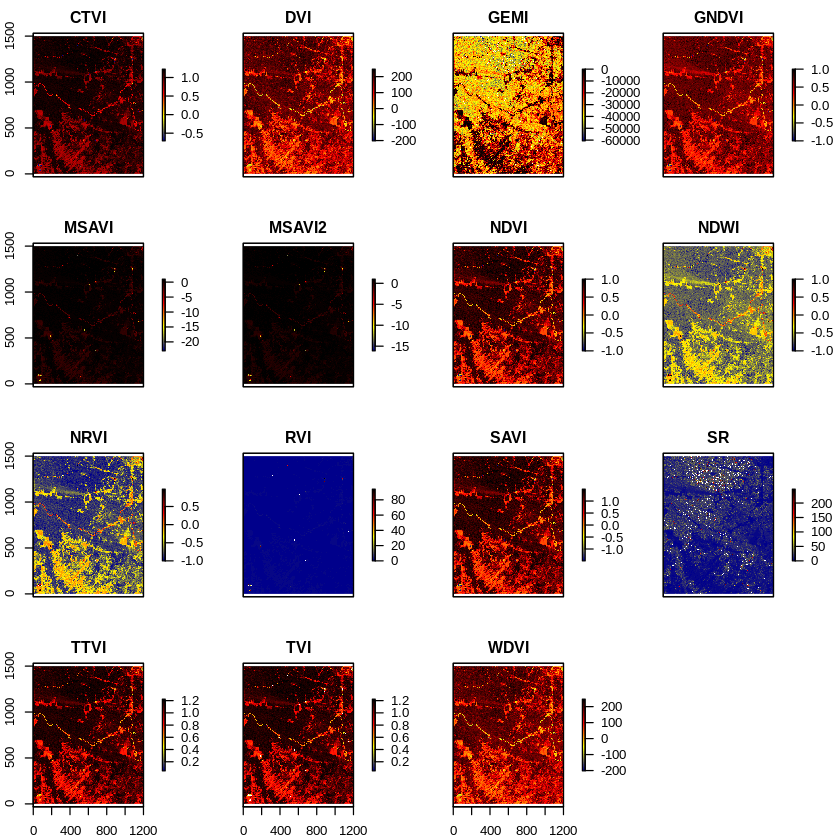

In [ ]:
# RStoolbox::spectralIndices
vi1 <- spectralIndices(mato_grosso_1992, green = 3, red = 2, nir = 1)
## Warning: EVI/EVI2 parameters L_evi, G, C1 and C2 are defined for reflectance [0,1] but img values are outside of this range.
## If you are using scaled reflectance values please provide the scaleFactor argument.
## If img is in DN or radiance it must be converted to reflectance.
## Skipping EVI calculation.
plot(vi1, col=cl)

In [ ]:
vi2 <- spectralIndices(mato_grosso_2006, green = 3, red = 2, nir = 1)
## Warning: EVI/EVI2 parameters L_evi, G, C1 and C2 are defined for reflectance [0,1] but img values are outside of this range.
## If you are using scaled reflectance values please provide the scaleFactor argument.
## If img is in DN or radiance it must be converted to reflectance.
## Skipping EVI calculation.
plot(vi2, col=cl)


In [ ]:

# worldwide NDVI
plot(copNDVI)


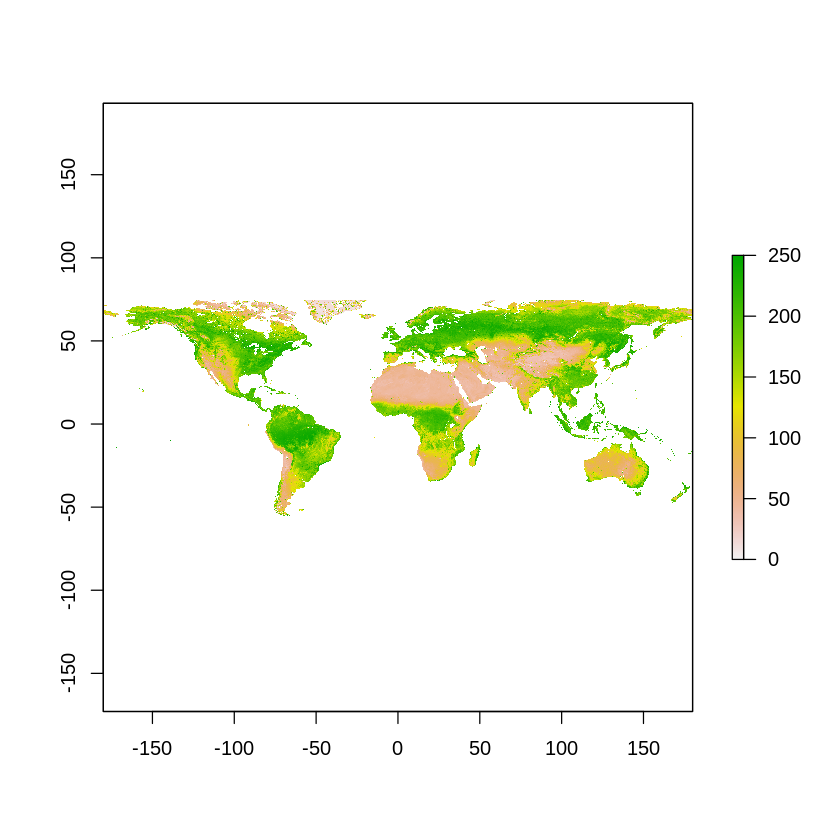

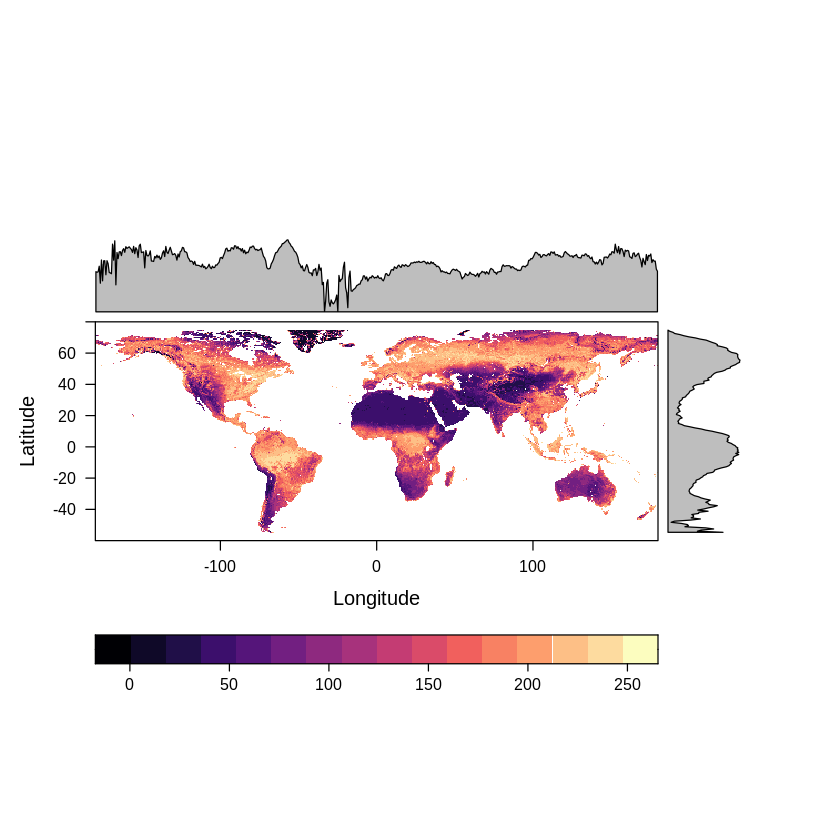

In [ ]:
# Pixels with values 253, 254 and 255 (water) will be set as NA’s.
copNDVI <- reclassify(copNDVI, cbind(253:255, NA))
plot(copNDVI)
# rasterVis package needed:
levelplot(copNDVI)
